In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## 데이터의 비대칭 해결

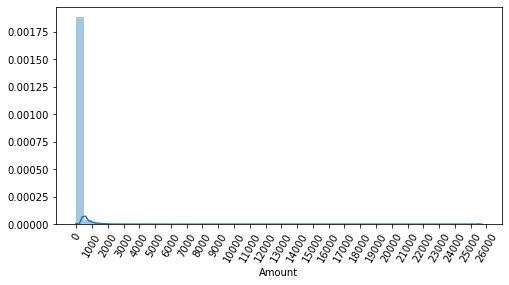

In [3]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [4]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 

In [5]:
scaler = StandardScaler()

features = card_df.iloc[:,1:-1].columns
scaled = scaler.fit_transform(card_df.iloc[:,1:-1])
scaled_data = pd.DataFrame(scaled, columns = features)

data = pd.concat([card_df.iloc[:,0], scaled_data, card_df.iloc[:,-1]], axis=1)
print(data.head(3))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
1   0.0  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
2   1.0 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507  0.246585   
1  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131  0.320694   
2  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092 -0.628537   

        V26       V27       V28    Amount  Class  
0 -0.392170  0.330892 -0.063781  0.244964      0  
1  0.261069 -0.022256  0.044608 -0.342475      0  
2 -0.288447 -0.137137 -0.181021  1.160686      0  

[3 rows x 31 columns]


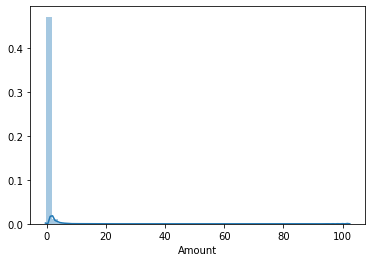

In [12]:
sns.distplot(data['Amount'])

## train

In [6]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [7]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(data)

In [8]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=400, learning_rate=0.2, max_depth=3)
evals = [(X_test, y_test)]
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = xgb.predict(X_test)

[0]	validation_0-logloss:0.51353
[1]	validation_0-logloss:0.39277
[2]	validation_0-logloss:0.30631
[3]	validation_0-logloss:0.24197
[4]	validation_0-logloss:0.19290
[5]	validation_0-logloss:0.15483
[6]	validation_0-logloss:0.12490
[7]	validation_0-logloss:0.10121
[8]	validation_0-logloss:0.08234
[9]	validation_0-logloss:0.06721
[10]	validation_0-logloss:0.05504
[11]	validation_0-logloss:0.04521
[12]	validation_0-logloss:0.03728
[13]	validation_0-logloss:0.03084
[14]	validation_0-logloss:0.02563
[15]	validation_0-logloss:0.02138
[16]	validation_0-logloss:0.01794
[17]	validation_0-logloss:0.01514
[18]	validation_0-logloss:0.01286
[19]	validation_0-logloss:0.01100
[20]	validation_0-logloss:0.00950
[21]	validation_0-logloss:0.00827
[22]	validation_0-logloss:0.00727
[23]	validation_0-logloss:0.00648
[24]	validation_0-logloss:0.00583
[25]	validation_0-logloss:0.00530
[26]	validation_0-logloss:0.00487
[27]	validation_0-logloss:0.00454
[28]	validation_0-logloss:0.00426
[29]	validation_0-loglos

In [19]:
get_clf_eval(y_test, preds)

오차 행렬
[[85290     5]
 [   40   108]]
정확도: 0.9995, 정밀도: 0.9558, 재현율: 0.7297,    F1: 0.8276, AUC:0.8648


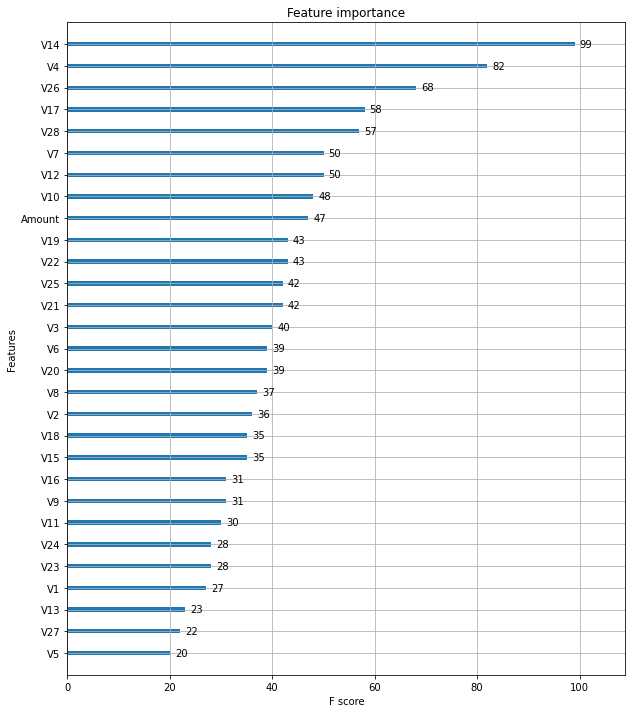

In [20]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

In [22]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400, boost_from_average=true)

evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=[(X_test, y_test)], verbose=True)
preds = lgbm.predict(X_test)

[1]	valid_0's binary_logloss: 0.0130438
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.0402989
[3]	valid_0's binary_logloss: 0.0196298
[4]	valid_0's binary_logloss: 0.0220136
[5]	valid_0's binary_logloss: 0.0249562
[6]	valid_0's binary_logloss: 0.0252917
[7]	valid_0's binary_logloss: 0.0283525
[8]	valid_0's binary_logloss: 0.0242241
[9]	valid_0's binary_logloss: 0.0225396
[10]	valid_0's binary_logloss: 0.0266209
[11]	valid_0's binary_logloss: 0.0239732
[12]	valid_0's binary_logloss: 0.0314107
[13]	valid_0's binary_logloss: 0.0298929
[14]	valid_0's binary_logloss: 0.0269832
[15]	valid_0's binary_logloss: 0.0346151
[16]	valid_0's binary_logloss: 0.0334474
[17]	valid_0's binary_logloss: 0.0303023
[18]	valid_0's binary_logloss: 0.0328181
[19]	valid_0's binary_logloss: 0.0355388
[20]	valid_0's binary_logloss: 0.0308823
[21]	valid_0's binary_logloss: 0.0394664
[22]	valid_0's binary_logloss: 0.0371929
[23]	valid_0's binary_logloss: 0.0360846
[24]

In [23]:
get_clf_eval(y_test, preds)

오차 행렬
[[85227    68]
 [   33   115]]
정확도: 0.9988, 정밀도: 0.6284, 재현율: 0.7770,    F1: 0.6949, AUC:0.8881


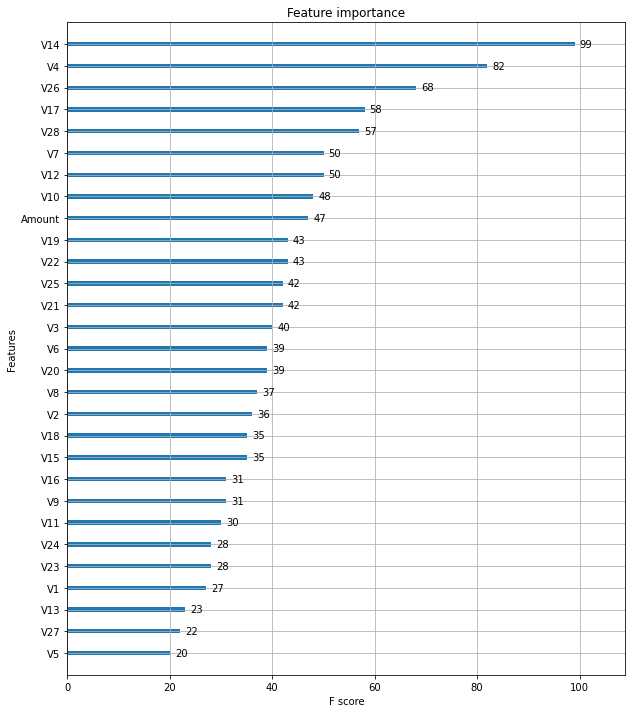

In [24]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

In [31]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[6, 8], 'min_child_weight':[5, 7], 'learning_rate':[0.1, 0.15]}

gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.92573	validation_1-auc:0.90521
[1]	validation_0-auc:0.92573	validation_1-auc:0.90521
[2]	validation_0-auc:0.92574	validation_1-auc:0.90522
[3]	validation_0-auc:0.92720	validation_1-auc:0.90861
[4]	validation_0-auc:0.92720	validation_1-auc:0.90860
[5]	validation_0-auc:0.92720	validation_1-auc:0.90860
[6]	validation_0-auc:0.92721	validation_1-auc:0.90860
[7]	validation_0-auc:0.92720	validation_1-auc:0.90859
[8]	validation_0-auc:0.92720	validation_1-auc:0.90859
[9]	validation_0-auc:0.92720	validation_1-auc:0.90859
[10]	validation_0-auc:0.92720	validation_1-auc:0.90858
[11]	validation_0-auc:0.92720	validation_1-auc:0.90858
[12]	validation_0-auc:0.92720	validation_1-auc:0.90858
[13]	validation_0-auc:0.92720	validation_1-auc:0.90858
[14]	validation_0-auc:0.92719	validation_1-auc:0.91194
[15]	validation_0-auc:0.92719	validation_1-auc:0.91194
[16]	validation_0-auc:0.92719	validation_1-auc:0.91195
[17]	validation_0-auc:0.92719	validation_1-auc:0.91195
[18]	validation_0-au

[50]	validation_0-auc:0.97794	validation_1-auc:0.96202
[51]	validation_0-auc:0.97818	validation_1-auc:0.96256
[52]	validation_0-auc:0.97817	validation_1-auc:0.96267
[53]	validation_0-auc:0.97817	validation_1-auc:0.96282
[54]	validation_0-auc:0.97808	validation_1-auc:0.96266
[55]	validation_0-auc:0.98877	validation_1-auc:0.96922
[56]	validation_0-auc:0.99059	validation_1-auc:0.97401
[57]	validation_0-auc:0.99071	validation_1-auc:0.97449
[58]	validation_0-auc:0.99124	validation_1-auc:0.97716
[59]	validation_0-auc:0.99169	validation_1-auc:0.97776
[60]	validation_0-auc:0.99160	validation_1-auc:0.97684
[61]	validation_0-auc:0.99201	validation_1-auc:0.97680
[62]	validation_0-auc:0.99193	validation_1-auc:0.97632
[63]	validation_0-auc:0.99187	validation_1-auc:0.97567
[64]	validation_0-auc:0.99227	validation_1-auc:0.97590
[65]	validation_0-auc:0.99208	validation_1-auc:0.97526
[66]	validation_0-auc:0.99242	validation_1-auc:0.97570
[67]	validation_0-auc:0.99205	validation_1-auc:0.97532
[68]	valid

[99]	validation_0-auc:0.99498	validation_1-auc:0.97899
[0]	validation_0-auc:0.92136	validation_1-auc:0.90521
[1]	validation_0-auc:0.92717	validation_1-auc:0.90857
[2]	validation_0-auc:0.92718	validation_1-auc:0.90857
[3]	validation_0-auc:0.92717	validation_1-auc:0.90857
[4]	validation_0-auc:0.92718	validation_1-auc:0.90857
[5]	validation_0-auc:0.92718	validation_1-auc:0.90857
[6]	validation_0-auc:0.92718	validation_1-auc:0.90857
[7]	validation_0-auc:0.92718	validation_1-auc:0.90857
[8]	validation_0-auc:0.92719	validation_1-auc:0.90858
[9]	validation_0-auc:0.92719	validation_1-auc:0.90857
[10]	validation_0-auc:0.92719	validation_1-auc:0.90857
[11]	validation_0-auc:0.92719	validation_1-auc:0.90857
[12]	validation_0-auc:0.92719	validation_1-auc:0.90858
[13]	validation_0-auc:0.92719	validation_1-auc:0.90858
[14]	validation_0-auc:0.92718	validation_1-auc:0.91193
[15]	validation_0-auc:0.92718	validation_1-auc:0.91193
[16]	validation_0-auc:0.92718	validation_1-auc:0.91194
[17]	validation_0-au

[49]	validation_0-auc:0.97657	validation_1-auc:0.95865
[50]	validation_0-auc:0.97666	validation_1-auc:0.95855
[51]	validation_0-auc:0.97658	validation_1-auc:0.95830
[52]	validation_0-auc:0.97659	validation_1-auc:0.95825
[53]	validation_0-auc:0.98388	validation_1-auc:0.97141
[54]	validation_0-auc:0.98708	validation_1-auc:0.97071
[55]	validation_0-auc:0.98728	validation_1-auc:0.97052
[56]	validation_0-auc:0.98763	validation_1-auc:0.97189
[57]	validation_0-auc:0.98886	validation_1-auc:0.97400
[58]	validation_0-auc:0.98917	validation_1-auc:0.97431
[59]	validation_0-auc:0.98922	validation_1-auc:0.97450
[60]	validation_0-auc:0.98948	validation_1-auc:0.97529
[61]	validation_0-auc:0.98999	validation_1-auc:0.97562
[62]	validation_0-auc:0.99030	validation_1-auc:0.97648
[63]	validation_0-auc:0.99195	validation_1-auc:0.97613
[64]	validation_0-auc:0.99197	validation_1-auc:0.97801
[65]	validation_0-auc:0.99287	validation_1-auc:0.97963
[66]	validation_0-auc:0.99298	validation_1-auc:0.98206
[67]	valid

[99]	validation_0-auc:0.99420	validation_1-auc:0.98625
[0]	validation_0-auc:0.91990	validation_1-auc:0.89841
[1]	validation_0-auc:0.92426	validation_1-auc:0.90519
[2]	validation_0-auc:0.92571	validation_1-auc:0.90856
[3]	validation_0-auc:0.92571	validation_1-auc:0.90855
[4]	validation_0-auc:0.92572	validation_1-auc:0.90856
[5]	validation_0-auc:0.92572	validation_1-auc:0.90856
[6]	validation_0-auc:0.92572	validation_1-auc:0.90856
[7]	validation_0-auc:0.92573	validation_1-auc:0.90856
[8]	validation_0-auc:0.92573	validation_1-auc:0.90857
[9]	validation_0-auc:0.92574	validation_1-auc:0.90858
[10]	validation_0-auc:0.92574	validation_1-auc:0.90858
[11]	validation_0-auc:0.92575	validation_1-auc:0.90858
[12]	validation_0-auc:0.92575	validation_1-auc:0.90859
[13]	validation_0-auc:0.92575	validation_1-auc:0.90859
[14]	validation_0-auc:0.92575	validation_1-auc:0.90859
[15]	validation_0-auc:0.92574	validation_1-auc:0.90859
[16]	validation_0-auc:0.92575	validation_1-auc:0.90859
[17]	validation_0-au

[49]	validation_0-auc:0.97891	validation_1-auc:0.95692
[50]	validation_0-auc:0.97911	validation_1-auc:0.95715
[51]	validation_0-auc:0.98337	validation_1-auc:0.96729
[52]	validation_0-auc:0.98336	validation_1-auc:0.96736
[53]	validation_0-auc:0.98391	validation_1-auc:0.96717
[54]	validation_0-auc:0.98427	validation_1-auc:0.96746
[55]	validation_0-auc:0.98447	validation_1-auc:0.96770
[56]	validation_0-auc:0.98449	validation_1-auc:0.96790
[57]	validation_0-auc:0.98547	validation_1-auc:0.97008
[58]	validation_0-auc:0.98560	validation_1-auc:0.96944
[59]	validation_0-auc:0.98569	validation_1-auc:0.96985
[60]	validation_0-auc:0.98573	validation_1-auc:0.96936
[61]	validation_0-auc:0.98821	validation_1-auc:0.97202
[62]	validation_0-auc:0.98823	validation_1-auc:0.97179
[63]	validation_0-auc:0.98865	validation_1-auc:0.97030
[64]	validation_0-auc:0.98852	validation_1-auc:0.97012
[65]	validation_0-auc:0.98867	validation_1-auc:0.97040
[66]	validation_0-auc:0.98843	validation_1-auc:0.97088
[67]	valid

[99]	validation_0-auc:0.99587	validation_1-auc:0.98434
[0]	validation_0-auc:0.92135	validation_1-auc:0.89842
[1]	validation_0-auc:0.92573	validation_1-auc:0.90519
[2]	validation_0-auc:0.92573	validation_1-auc:0.90520
[3]	validation_0-auc:0.92573	validation_1-auc:0.90519
[4]	validation_0-auc:0.92573	validation_1-auc:0.90520
[5]	validation_0-auc:0.92719	validation_1-auc:0.90858
[6]	validation_0-auc:0.92719	validation_1-auc:0.90858
[7]	validation_0-auc:0.92718	validation_1-auc:0.91193
[8]	validation_0-auc:0.92719	validation_1-auc:0.91194
[9]	validation_0-auc:0.92719	validation_1-auc:0.91194
[10]	validation_0-auc:0.92718	validation_1-auc:0.91194
[11]	validation_0-auc:0.92718	validation_1-auc:0.91194
[12]	validation_0-auc:0.92719	validation_1-auc:0.91194
[13]	validation_0-auc:0.92718	validation_1-auc:0.91195
[14]	validation_0-auc:0.92719	validation_1-auc:0.91195
[15]	validation_0-auc:0.92718	validation_1-auc:0.91194
[16]	validation_0-auc:0.92718	validation_1-auc:0.91194
[17]	validation_0-au

[49]	validation_0-auc:0.97870	validation_1-auc:0.96205
[50]	validation_0-auc:0.97877	validation_1-auc:0.96221
[51]	validation_0-auc:0.97864	validation_1-auc:0.96226
[52]	validation_0-auc:0.97866	validation_1-auc:0.96226
[53]	validation_0-auc:0.97951	validation_1-auc:0.96160
[54]	validation_0-auc:0.97958	validation_1-auc:0.96146
[55]	validation_0-auc:0.98078	validation_1-auc:0.96418
[56]	validation_0-auc:0.98015	validation_1-auc:0.96561
[57]	validation_0-auc:0.98020	validation_1-auc:0.96594
[58]	validation_0-auc:0.98796	validation_1-auc:0.97381
[59]	validation_0-auc:0.98940	validation_1-auc:0.97336
[60]	validation_0-auc:0.99055	validation_1-auc:0.97232
[61]	validation_0-auc:0.99075	validation_1-auc:0.97224
[62]	validation_0-auc:0.99087	validation_1-auc:0.97173
[63]	validation_0-auc:0.99215	validation_1-auc:0.97395
[64]	validation_0-auc:0.99213	validation_1-auc:0.97538
[65]	validation_0-auc:0.99205	validation_1-auc:0.97573
[66]	validation_0-auc:0.99191	validation_1-auc:0.97662
[67]	valid

[99]	validation_0-auc:0.99643	validation_1-auc:0.98582
[0]	validation_0-auc:0.92572	validation_1-auc:0.90520
[1]	validation_0-auc:0.92573	validation_1-auc:0.90521
[2]	validation_0-auc:0.92574	validation_1-auc:0.90522
[3]	validation_0-auc:0.92574	validation_1-auc:0.90522
[4]	validation_0-auc:0.92574	validation_1-auc:0.90522
[5]	validation_0-auc:0.92574	validation_1-auc:0.90522
[6]	validation_0-auc:0.92574	validation_1-auc:0.90522
[7]	validation_0-auc:0.92575	validation_1-auc:0.90860
[8]	validation_0-auc:0.92574	validation_1-auc:0.90860
[9]	validation_0-auc:0.92575	validation_1-auc:0.90859
[10]	validation_0-auc:0.92575	validation_1-auc:0.90860
[11]	validation_0-auc:0.92575	validation_1-auc:0.90859
[12]	validation_0-auc:0.92575	validation_1-auc:0.90860
[13]	validation_0-auc:0.92575	validation_1-auc:0.90860
[14]	validation_0-auc:0.92575	validation_1-auc:0.90860
[15]	validation_0-auc:0.92720	validation_1-auc:0.90858
[16]	validation_0-auc:0.92720	validation_1-auc:0.90858
[17]	validation_0-au

[48]	validation_0-auc:0.97623	validation_1-auc:0.95860
[49]	validation_0-auc:0.97636	validation_1-auc:0.95895
[50]	validation_0-auc:0.97655	validation_1-auc:0.95892
[51]	validation_0-auc:0.97765	validation_1-auc:0.96166
[52]	validation_0-auc:0.97765	validation_1-auc:0.96168
[53]	validation_0-auc:0.97761	validation_1-auc:0.96467
[54]	validation_0-auc:0.97766	validation_1-auc:0.96474
[55]	validation_0-auc:0.97771	validation_1-auc:0.96462
[56]	validation_0-auc:0.97776	validation_1-auc:0.96453
[57]	validation_0-auc:0.97776	validation_1-auc:0.96440
[58]	validation_0-auc:0.98085	validation_1-auc:0.96520
[59]	validation_0-auc:0.98113	validation_1-auc:0.96525
[60]	validation_0-auc:0.98128	validation_1-auc:0.96526
[61]	validation_0-auc:0.98140	validation_1-auc:0.96515
[62]	validation_0-auc:0.98838	validation_1-auc:0.97220
[63]	validation_0-auc:0.98799	validation_1-auc:0.97407
[64]	validation_0-auc:0.98784	validation_1-auc:0.97344
[65]	validation_0-auc:0.98939	validation_1-auc:0.97174
[66]	valid

[97]	validation_0-auc:0.99717	validation_1-auc:0.98604
[98]	validation_0-auc:0.99713	validation_1-auc:0.98601
[99]	validation_0-auc:0.99727	validation_1-auc:0.98591
[0]	validation_0-auc:0.92715	validation_1-auc:0.90855
[1]	validation_0-auc:0.92718	validation_1-auc:0.90857
[2]	validation_0-auc:0.92719	validation_1-auc:0.90857
[3]	validation_0-auc:0.92719	validation_1-auc:0.90859
[4]	validation_0-auc:0.92720	validation_1-auc:0.90859
[5]	validation_0-auc:0.92720	validation_1-auc:0.90859
[6]	validation_0-auc:0.92720	validation_1-auc:0.90859
[7]	validation_0-auc:0.92720	validation_1-auc:0.90859
[8]	validation_0-auc:0.92720	validation_1-auc:0.90859
[9]	validation_0-auc:0.92720	validation_1-auc:0.90859
[10]	validation_0-auc:0.92720	validation_1-auc:0.90859
[11]	validation_0-auc:0.92719	validation_1-auc:0.91195
[12]	validation_0-auc:0.92719	validation_1-auc:0.91195
[13]	validation_0-auc:0.92719	validation_1-auc:0.91194
[14]	validation_0-auc:0.92719	validation_1-auc:0.91194
[15]	validation_0-au

[47]	validation_0-auc:0.97822	validation_1-auc:0.95646
[48]	validation_0-auc:0.97822	validation_1-auc:0.95596
[49]	validation_0-auc:0.97844	validation_1-auc:0.95625
[50]	validation_0-auc:0.98086	validation_1-auc:0.95521
[51]	validation_0-auc:0.98086	validation_1-auc:0.95511
[52]	validation_0-auc:0.98065	validation_1-auc:0.95752
[53]	validation_0-auc:0.98054	validation_1-auc:0.95988
[54]	validation_0-auc:0.98123	validation_1-auc:0.96456
[55]	validation_0-auc:0.99002	validation_1-auc:0.97438
[56]	validation_0-auc:0.98966	validation_1-auc:0.97432
[57]	validation_0-auc:0.99020	validation_1-auc:0.97521
[58]	validation_0-auc:0.99125	validation_1-auc:0.97696
[59]	validation_0-auc:0.99133	validation_1-auc:0.97628
[60]	validation_0-auc:0.99179	validation_1-auc:0.97671
[61]	validation_0-auc:0.99152	validation_1-auc:0.97674
[62]	validation_0-auc:0.99128	validation_1-auc:0.97630
[63]	validation_0-auc:0.99164	validation_1-auc:0.97740
[64]	validation_0-auc:0.99163	validation_1-auc:0.97710
[65]	valid

[96]	validation_0-auc:0.99217	validation_1-auc:0.98190
[97]	validation_0-auc:0.99214	validation_1-auc:0.98239
[98]	validation_0-auc:0.99213	validation_1-auc:0.98224
[99]	validation_0-auc:0.99248	validation_1-auc:0.98292
[0]	validation_0-auc:0.92136	validation_1-auc:0.90519
[1]	validation_0-auc:0.92717	validation_1-auc:0.90855
[2]	validation_0-auc:0.92716	validation_1-auc:0.90855
[3]	validation_0-auc:0.92717	validation_1-auc:0.90855
[4]	validation_0-auc:0.92717	validation_1-auc:0.90855
[5]	validation_0-auc:0.92717	validation_1-auc:0.90856
[6]	validation_0-auc:0.92717	validation_1-auc:0.90855
[7]	validation_0-auc:0.92717	validation_1-auc:0.90854
[8]	validation_0-auc:0.92717	validation_1-auc:0.90854
[9]	validation_0-auc:0.92716	validation_1-auc:0.91190
[10]	validation_0-auc:0.92716	validation_1-auc:0.91190
[11]	validation_0-auc:0.92717	validation_1-auc:0.91190
[12]	validation_0-auc:0.92717	validation_1-auc:0.91190
[13]	validation_0-auc:0.92716	validation_1-auc:0.91189
[14]	validation_0-au

[46]	validation_0-auc:0.97709	validation_1-auc:0.96171
[47]	validation_0-auc:0.97707	validation_1-auc:0.96171
[48]	validation_0-auc:0.97710	validation_1-auc:0.96174
[49]	validation_0-auc:0.97710	validation_1-auc:0.96168
[50]	validation_0-auc:0.97710	validation_1-auc:0.96167
[51]	validation_0-auc:0.97708	validation_1-auc:0.96154
[52]	validation_0-auc:0.98647	validation_1-auc:0.97200
[53]	validation_0-auc:0.98710	validation_1-auc:0.97220
[54]	validation_0-auc:0.98710	validation_1-auc:0.97263
[55]	validation_0-auc:0.98754	validation_1-auc:0.97412
[56]	validation_0-auc:0.98915	validation_1-auc:0.97514
[57]	validation_0-auc:0.98936	validation_1-auc:0.97502
[58]	validation_0-auc:0.98940	validation_1-auc:0.97493
[59]	validation_0-auc:0.98991	validation_1-auc:0.97753
[60]	validation_0-auc:0.99142	validation_1-auc:0.97795
[61]	validation_0-auc:0.99142	validation_1-auc:0.97840
[62]	validation_0-auc:0.99164	validation_1-auc:0.97903
[63]	validation_0-auc:0.99168	validation_1-auc:0.98122
[64]	valid

[96]	validation_0-auc:0.99598	validation_1-auc:0.98643
[97]	validation_0-auc:0.99589	validation_1-auc:0.98645
[98]	validation_0-auc:0.99589	validation_1-auc:0.98696
[99]	validation_0-auc:0.99599	validation_1-auc:0.98680
[0]	validation_0-auc:0.92427	validation_1-auc:0.90858
[1]	validation_0-auc:0.92427	validation_1-auc:0.90858
[2]	validation_0-auc:0.92574	validation_1-auc:0.90860
[3]	validation_0-auc:0.92574	validation_1-auc:0.90859
[4]	validation_0-auc:0.92575	validation_1-auc:0.90861
[5]	validation_0-auc:0.92575	validation_1-auc:0.90860
[6]	validation_0-auc:0.92575	validation_1-auc:0.90860
[7]	validation_0-auc:0.92575	validation_1-auc:0.90861
[8]	validation_0-auc:0.92719	validation_1-auc:0.91195
[9]	validation_0-auc:0.92719	validation_1-auc:0.91195
[10]	validation_0-auc:0.92719	validation_1-auc:0.91195
[11]	validation_0-auc:0.92719	validation_1-auc:0.91195
[12]	validation_0-auc:0.93006	validation_1-auc:0.91190
[13]	validation_0-auc:0.93006	validation_1-auc:0.91189
[14]	validation_0-au

[48]	validation_0-auc:0.99162	validation_1-auc:0.97762
[49]	validation_0-auc:0.99166	validation_1-auc:0.97774
[50]	validation_0-auc:0.99174	validation_1-auc:0.97778
[51]	validation_0-auc:0.99176	validation_1-auc:0.97800
[52]	validation_0-auc:0.99215	validation_1-auc:0.97917
[53]	validation_0-auc:0.99220	validation_1-auc:0.97915
[54]	validation_0-auc:0.99221	validation_1-auc:0.97905
[55]	validation_0-auc:0.99294	validation_1-auc:0.97899
[56]	validation_0-auc:0.99328	validation_1-auc:0.97735
[57]	validation_0-auc:0.99354	validation_1-auc:0.97679
[58]	validation_0-auc:0.99333	validation_1-auc:0.97598
[59]	validation_0-auc:0.99366	validation_1-auc:0.97546
[60]	validation_0-auc:0.99374	validation_1-auc:0.97544
[61]	validation_0-auc:0.99365	validation_1-auc:0.97600
[62]	validation_0-auc:0.99371	validation_1-auc:0.97591
[63]	validation_0-auc:0.99401	validation_1-auc:0.97647
[64]	validation_0-auc:0.99404	validation_1-auc:0.97774
[65]	validation_0-auc:0.99412	validation_1-auc:0.97761
[66]	valid

[98]	validation_0-auc:0.99673	validation_1-auc:0.98429
[99]	validation_0-auc:0.99670	validation_1-auc:0.98421
[0]	validation_0-auc:0.92136	validation_1-auc:0.89843
[1]	validation_0-auc:0.92574	validation_1-auc:0.90520
[2]	validation_0-auc:0.92573	validation_1-auc:0.90520
[3]	validation_0-auc:0.92718	validation_1-auc:0.90856
[4]	validation_0-auc:0.92718	validation_1-auc:0.90855
[5]	validation_0-auc:0.92719	validation_1-auc:0.90856
[6]	validation_0-auc:0.92719	validation_1-auc:0.91194
[7]	validation_0-auc:0.92719	validation_1-auc:0.91195
[8]	validation_0-auc:0.92719	validation_1-auc:0.91195
[9]	validation_0-auc:0.92719	validation_1-auc:0.91194
[10]	validation_0-auc:0.92719	validation_1-auc:0.91195
[11]	validation_0-auc:0.92719	validation_1-auc:0.91195
[12]	validation_0-auc:0.93005	validation_1-auc:0.91189
[13]	validation_0-auc:0.93005	validation_1-auc:0.91188
[14]	validation_0-auc:0.93005	validation_1-auc:0.91188
[15]	validation_0-auc:0.93277	validation_1-auc:0.91160
[16]	validation_0-au

[69]	validation_0-auc:0.99397	validation_1-auc:0.98702
[70]	validation_0-auc:0.99428	validation_1-auc:0.98719
[71]	validation_0-auc:0.99424	validation_1-auc:0.98764
[72]	validation_0-auc:0.99413	validation_1-auc:0.98781
[73]	validation_0-auc:0.99445	validation_1-auc:0.98795
[74]	validation_0-auc:0.99462	validation_1-auc:0.98762
[75]	validation_0-auc:0.99482	validation_1-auc:0.98769
[76]	validation_0-auc:0.99483	validation_1-auc:0.98755
[77]	validation_0-auc:0.99494	validation_1-auc:0.98787
[78]	validation_0-auc:0.99490	validation_1-auc:0.98764
[79]	validation_0-auc:0.99491	validation_1-auc:0.98809
[80]	validation_0-auc:0.99509	validation_1-auc:0.98821
[81]	validation_0-auc:0.99503	validation_1-auc:0.98834
[82]	validation_0-auc:0.99512	validation_1-auc:0.98864
[83]	validation_0-auc:0.99522	validation_1-auc:0.98881
[84]	validation_0-auc:0.99539	validation_1-auc:0.98922
[85]	validation_0-auc:0.99569	validation_1-auc:0.98901
[86]	validation_0-auc:0.99572	validation_1-auc:0.98861
[87]	valid

[28]	validation_0-auc:0.97637	validation_1-auc:0.95697
[29]	validation_0-auc:0.97636	validation_1-auc:0.95747
[30]	validation_0-auc:0.97669	validation_1-auc:0.95763
[31]	validation_0-auc:0.97670	validation_1-auc:0.95776
[32]	validation_0-auc:0.97893	validation_1-auc:0.95668
[33]	validation_0-auc:0.97890	validation_1-auc:0.95685
[34]	validation_0-auc:0.97911	validation_1-auc:0.95704
[35]	validation_0-auc:0.98375	validation_1-auc:0.96647
[36]	validation_0-auc:0.98414	validation_1-auc:0.96630
[37]	validation_0-auc:0.98406	validation_1-auc:0.96674
[38]	validation_0-auc:0.98533	validation_1-auc:0.96943
[39]	validation_0-auc:0.98516	validation_1-auc:0.96926
[40]	validation_0-auc:0.98518	validation_1-auc:0.96960
[41]	validation_0-auc:0.98536	validation_1-auc:0.96925
[42]	validation_0-auc:0.98771	validation_1-auc:0.97134
[43]	validation_0-auc:0.98852	validation_1-auc:0.97011
[44]	validation_0-auc:0.98900	validation_1-auc:0.96872
[45]	validation_0-auc:0.98865	validation_1-auc:0.97261
[46]	valid

[79]	validation_0-auc:0.99671	validation_1-auc:0.98595
[80]	validation_0-auc:0.99663	validation_1-auc:0.98580
[81]	validation_0-auc:0.99665	validation_1-auc:0.98593
[82]	validation_0-auc:0.99662	validation_1-auc:0.98630
[83]	validation_0-auc:0.99647	validation_1-auc:0.98550
[84]	validation_0-auc:0.99661	validation_1-auc:0.98529
[85]	validation_0-auc:0.99681	validation_1-auc:0.98506
[86]	validation_0-auc:0.99666	validation_1-auc:0.98505
[87]	validation_0-auc:0.99657	validation_1-auc:0.98544
[88]	validation_0-auc:0.99640	validation_1-auc:0.98598
[89]	validation_0-auc:0.99664	validation_1-auc:0.98602
[90]	validation_0-auc:0.99659	validation_1-auc:0.98590
[91]	validation_0-auc:0.99649	validation_1-auc:0.98595
[92]	validation_0-auc:0.99672	validation_1-auc:0.98588
[93]	validation_0-auc:0.99682	validation_1-auc:0.98588
[94]	validation_0-auc:0.99696	validation_1-auc:0.98622
[95]	validation_0-auc:0.99711	validation_1-auc:0.98604
[96]	validation_0-auc:0.99707	validation_1-auc:0.98567
[97]	valid

[29]	validation_0-auc:0.97745	validation_1-auc:0.95846
[30]	validation_0-auc:0.97747	validation_1-auc:0.95863
[31]	validation_0-auc:0.97750	validation_1-auc:0.95880
[32]	validation_0-auc:0.97877	validation_1-auc:0.96202
[33]	validation_0-auc:0.97884	validation_1-auc:0.96227
[34]	validation_0-auc:0.97872	validation_1-auc:0.96201
[35]	validation_0-auc:0.97966	validation_1-auc:0.96395
[36]	validation_0-auc:0.98079	validation_1-auc:0.96374
[37]	validation_0-auc:0.98927	validation_1-auc:0.97172
[38]	validation_0-auc:0.98864	validation_1-auc:0.97135
[39]	validation_0-auc:0.98930	validation_1-auc:0.97392
[40]	validation_0-auc:0.99167	validation_1-auc:0.97342
[41]	validation_0-auc:0.99273	validation_1-auc:0.97203
[42]	validation_0-auc:0.99261	validation_1-auc:0.97261
[43]	validation_0-auc:0.99289	validation_1-auc:0.97444
[44]	validation_0-auc:0.99266	validation_1-auc:0.97609
[45]	validation_0-auc:0.99289	validation_1-auc:0.98119
[46]	validation_0-auc:0.99316	validation_1-auc:0.98204
[47]	valid

[79]	validation_0-auc:0.99752	validation_1-auc:0.98518
[80]	validation_0-auc:0.99757	validation_1-auc:0.98495
[81]	validation_0-auc:0.99753	validation_1-auc:0.98539
[82]	validation_0-auc:0.99753	validation_1-auc:0.98518
[83]	validation_0-auc:0.99764	validation_1-auc:0.98575
[84]	validation_0-auc:0.99762	validation_1-auc:0.98530
[85]	validation_0-auc:0.99761	validation_1-auc:0.98598
[86]	validation_0-auc:0.99766	validation_1-auc:0.98552
[87]	validation_0-auc:0.99762	validation_1-auc:0.98589
[88]	validation_0-auc:0.99757	validation_1-auc:0.98574
[89]	validation_0-auc:0.99755	validation_1-auc:0.98602
[90]	validation_0-auc:0.99737	validation_1-auc:0.98589
[91]	validation_0-auc:0.99744	validation_1-auc:0.98607
[92]	validation_0-auc:0.99736	validation_1-auc:0.98549
[93]	validation_0-auc:0.99743	validation_1-auc:0.98500
[94]	validation_0-auc:0.99738	validation_1-auc:0.98538
[95]	validation_0-auc:0.99738	validation_1-auc:0.98519
[96]	validation_0-auc:0.99730	validation_1-auc:0.98572
[97]	valid

[29]	validation_0-auc:0.96876	validation_1-auc:0.94836
[30]	validation_0-auc:0.96877	validation_1-auc:0.94850
[31]	validation_0-auc:0.96878	validation_1-auc:0.94838
[32]	validation_0-auc:0.97589	validation_1-auc:0.95827
[33]	validation_0-auc:0.97629	validation_1-auc:0.95846
[34]	validation_0-auc:0.97648	validation_1-auc:0.95870
[35]	validation_0-auc:0.97656	validation_1-auc:0.95867
[36]	validation_0-auc:0.97754	validation_1-auc:0.96152
[37]	validation_0-auc:0.97760	validation_1-auc:0.96137
[38]	validation_0-auc:0.98107	validation_1-auc:0.96576
[39]	validation_0-auc:0.98330	validation_1-auc:0.96693
[40]	validation_0-auc:0.98355	validation_1-auc:0.96629
[41]	validation_0-auc:0.98354	validation_1-auc:0.96658
[42]	validation_0-auc:0.98569	validation_1-auc:0.97225
[43]	validation_0-auc:0.98561	validation_1-auc:0.97162
[44]	validation_0-auc:0.98877	validation_1-auc:0.96970
[45]	validation_0-auc:0.98959	validation_1-auc:0.97225
[46]	validation_0-auc:0.99038	validation_1-auc:0.97086
[47]	valid

[82]	validation_0-auc:0.99713	validation_1-auc:0.98389
[83]	validation_0-auc:0.99739	validation_1-auc:0.98398
[84]	validation_0-auc:0.99747	validation_1-auc:0.98457
[85]	validation_0-auc:0.99734	validation_1-auc:0.98441
[0]	validation_0-auc:0.92715	validation_1-auc:0.90855
[1]	validation_0-auc:0.92718	validation_1-auc:0.90857
[2]	validation_0-auc:0.92719	validation_1-auc:0.90858
[3]	validation_0-auc:0.92719	validation_1-auc:0.90858
[4]	validation_0-auc:0.92719	validation_1-auc:0.90858
[5]	validation_0-auc:0.92720	validation_1-auc:0.90858
[6]	validation_0-auc:0.92720	validation_1-auc:0.90858
[7]	validation_0-auc:0.92720	validation_1-auc:0.91196
[8]	validation_0-auc:0.92719	validation_1-auc:0.91194
[9]	validation_0-auc:0.92719	validation_1-auc:0.91193
[10]	validation_0-auc:0.92719	validation_1-auc:0.91194
[11]	validation_0-auc:0.92719	validation_1-auc:0.91194
[12]	validation_0-auc:0.92719	validation_1-auc:0.91194
[13]	validation_0-auc:0.93004	validation_1-auc:0.91187
[14]	validation_0-au

[46]	validation_0-auc:0.99204	validation_1-auc:0.97721
[47]	validation_0-auc:0.99180	validation_1-auc:0.97755
[48]	validation_0-auc:0.99335	validation_1-auc:0.97901
[49]	validation_0-auc:0.99358	validation_1-auc:0.97900
[50]	validation_0-auc:0.99417	validation_1-auc:0.98130
[51]	validation_0-auc:0.99488	validation_1-auc:0.98196
[52]	validation_0-auc:0.99483	validation_1-auc:0.98223
[53]	validation_0-auc:0.99503	validation_1-auc:0.98284
[54]	validation_0-auc:0.99500	validation_1-auc:0.98386
[55]	validation_0-auc:0.99516	validation_1-auc:0.98386
[56]	validation_0-auc:0.99544	validation_1-auc:0.98453
[57]	validation_0-auc:0.99555	validation_1-auc:0.98421
[58]	validation_0-auc:0.99554	validation_1-auc:0.98482
[59]	validation_0-auc:0.99591	validation_1-auc:0.98544
[60]	validation_0-auc:0.99611	validation_1-auc:0.98481
[61]	validation_0-auc:0.99628	validation_1-auc:0.98469
[62]	validation_0-auc:0.99626	validation_1-auc:0.98372
[63]	validation_0-auc:0.99624	validation_1-auc:0.98422
[64]	valid

[95]	validation_0-auc:0.99316	validation_1-auc:0.98082
[96]	validation_0-auc:0.99308	validation_1-auc:0.98071
[97]	validation_0-auc:0.99323	validation_1-auc:0.98049
[98]	validation_0-auc:0.99343	validation_1-auc:0.98044
[0]	validation_0-auc:0.92136	validation_1-auc:0.90519
[1]	validation_0-auc:0.92717	validation_1-auc:0.90855
[2]	validation_0-auc:0.92717	validation_1-auc:0.90855
[3]	validation_0-auc:0.92717	validation_1-auc:0.90855
[4]	validation_0-auc:0.92717	validation_1-auc:0.90855
[5]	validation_0-auc:0.92717	validation_1-auc:0.90855
[6]	validation_0-auc:0.92717	validation_1-auc:0.90855
[7]	validation_0-auc:0.92716	validation_1-auc:0.91190
[8]	validation_0-auc:0.92716	validation_1-auc:0.91190
[9]	validation_0-auc:0.92717	validation_1-auc:0.91190
[10]	validation_0-auc:0.92717	validation_1-auc:0.91190
[11]	validation_0-auc:0.92717	validation_1-auc:0.91190
[12]	validation_0-auc:0.92717	validation_1-auc:0.91192
[13]	validation_0-auc:0.92717	validation_1-auc:0.91192
[14]	validation_0-au

[46]	validation_0-auc:0.99346	validation_1-auc:0.98156
[47]	validation_0-auc:0.99365	validation_1-auc:0.98036
[48]	validation_0-auc:0.99389	validation_1-auc:0.98177
[49]	validation_0-auc:0.99380	validation_1-auc:0.98286
[50]	validation_0-auc:0.99428	validation_1-auc:0.98347
[51]	validation_0-auc:0.99442	validation_1-auc:0.98381
[52]	validation_0-auc:0.99455	validation_1-auc:0.98379
[53]	validation_0-auc:0.99472	validation_1-auc:0.98328
[54]	validation_0-auc:0.99451	validation_1-auc:0.98322
[55]	validation_0-auc:0.99470	validation_1-auc:0.98492
[56]	validation_0-auc:0.99489	validation_1-auc:0.98566
[57]	validation_0-auc:0.99566	validation_1-auc:0.98527
[58]	validation_0-auc:0.99575	validation_1-auc:0.98501
[59]	validation_0-auc:0.99619	validation_1-auc:0.98493
[60]	validation_0-auc:0.99628	validation_1-auc:0.98471
[61]	validation_0-auc:0.99657	validation_1-auc:0.98466
[62]	validation_0-auc:0.99679	validation_1-auc:0.98477
[63]	validation_0-auc:0.99675	validation_1-auc:0.98505
[64]	valid

[96]	validation_0-auc:0.99920	validation_1-auc:0.98343
[97]	validation_0-auc:0.99928	validation_1-auc:0.98333
[98]	validation_0-auc:0.99930	validation_1-auc:0.98365
[99]	validation_0-auc:0.99936	validation_1-auc:0.98297


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [32]:
from sklearn.metrics import roc_auc_score

print('최적 파라미터:', gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

최적 파라미터: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5}
ROC AUC: 0.9844


In [38]:
xgb_clf = XGBClassifier(n_estimators=1000, max_depth=6, learning_rate=0.1, min_child_weight=5)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=evals, verbose=True)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.90521
[1]	validation_0-auc:0.90522
[2]	validation_0-auc:0.90522
[3]	validation_0-auc:0.90523
[4]	validation_0-auc:0.90523
[5]	validation_0-auc:0.90523
[6]	validation_0-auc:0.90860
[7]	validation_0-auc:0.90860
[8]	validation_0-auc:0.90859
[9]	validation_0-auc:0.90860
[10]	validation_0-auc:0.90860
[11]	validation_0-auc:0.90860
[12]	validation_0-auc:0.91196
[13]	validation_0-auc:0.91195
[14]	validation_0-auc:0.91195
[15]	validation_0-auc:0.91195
[16]	validation_0-auc:0.91195
[17]	validation_0-auc:0.91195
[18]	validation_0-auc:0.91196
[19]	validation_0-auc:0.91196
[20]	validation_0-auc:0.91190
[21]	validation_0-auc:0.91190
[22]	validation_0-auc:0.91190
[23]	validation_0-auc:0.91189
[24]	validation_0-auc:0.91188
[25]	validation_0-auc:0.91179
[26]	validation_0-auc:0.91179
[27]	validation_0-auc:0.92963
[28]	validation_0-auc:0.92967
[29]	validation_0-auc:0.92968
[30]	validation_0-auc:0.92940
[31]	validation_0-auc:0.92940
[32]	validation_0-auc:0.92932
[33]	validation_0-au

[268]	validation_0-auc:0.97829
[269]	validation_0-auc:0.97827
[270]	validation_0-auc:0.97823
[271]	validation_0-auc:0.97823
[272]	validation_0-auc:0.97815
[273]	validation_0-auc:0.97811
[274]	validation_0-auc:0.97818
[275]	validation_0-auc:0.97817
[276]	validation_0-auc:0.97813
[277]	validation_0-auc:0.97814
[278]	validation_0-auc:0.97802
[279]	validation_0-auc:0.97804
[280]	validation_0-auc:0.97808
[281]	validation_0-auc:0.97816
[282]	validation_0-auc:0.97815
[283]	validation_0-auc:0.97809
[284]	validation_0-auc:0.97810
[285]	validation_0-auc:0.97806
[286]	validation_0-auc:0.97787
[287]	validation_0-auc:0.97781
[288]	validation_0-auc:0.97783
[289]	validation_0-auc:0.97784
[290]	validation_0-auc:0.97782
[291]	validation_0-auc:0.97788
[292]	validation_0-auc:0.97792
[293]	validation_0-auc:0.97786
[294]	validation_0-auc:0.97783
[295]	validation_0-auc:0.97768
[296]	validation_0-auc:0.97761
[297]	validation_0-auc:0.97760
[298]	validation_0-auc:0.97763
[299]	validation_0-auc:0.97768
[300]	va

In [33]:
lgbm_clf = LGBMClassifier(n_estimators=100)

params = {'max_depth':[4,6], 'min_child_samples':[40, 70, 100], 'learning_rate':[0.2, 0.3]}

gridcv2 = GridSearchCV(lgbm_clf, param_grid=params)
gridcv2.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

[1]	valid_0's auc: 0.955554	valid_0's binary_logloss: 0.021196	valid_1's auc: 0.904077	valid_1's binary_logloss: 0.0205859
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.126977	valid_0's binary_logloss: 0.0546008	valid_1's auc: 0.133509	valid_1's binary_logloss: 0.0527943
[3]	valid_0's auc: 0.850087	valid_0's binary_logloss: 0.0242734	valid_1's auc: 0.761084	valid_1's binary_logloss: 0.0298952
[4]	valid_0's auc: 0.849992	valid_0's binary_logloss: 0.0280903	valid_1's auc: 0.754068	valid_1's binary_logloss: 0.0356631
[5]	valid_0's auc: 0.847318	valid_0's binary_logloss: 0.018372	valid_1's auc: 0.747625	valid_1's binary_logloss: 0.0252195
[6]	valid_0's auc: 0.85005	valid_0's binary_logloss: 0.0227901	valid_1's auc: 0.747131	valid_1's binary_logloss: 0.0299701
[7]	valid_0's auc: 0.846532	valid_0's binary_logloss: 0.0213291	valid_1's auc: 0.746889	valid_1's binary_logloss: 0.0289938
[8]	valid_0's auc: 0.849516	valid_0's binary_logloss: 0.0180589	valid_1's 

[1]	valid_0's auc: 0.955019	valid_0's binary_logloss: 0.0205643	valid_1's auc: 0.925822	valid_1's binary_logloss: 0.0212113
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.27616	valid_0's binary_logloss: 0.0473069	valid_1's auc: 0.335185	valid_1's binary_logloss: 0.0430558
[3]	valid_0's auc: 0.903879	valid_0's binary_logloss: 0.0191552	valid_1's auc: 0.862083	valid_1's binary_logloss: 0.0225745
[4]	valid_0's auc: 0.899197	valid_0's binary_logloss: 0.0174113	valid_1's auc: 0.855049	valid_1's binary_logloss: 0.0197021
[5]	valid_0's auc: 0.896619	valid_0's binary_logloss: 0.0277209	valid_1's auc: 0.853369	valid_1's binary_logloss: 0.0342431
[6]	valid_0's auc: 0.897824	valid_0's binary_logloss: 0.0217014	valid_1's auc: 0.85866	valid_1's binary_logloss: 0.0279933
[7]	valid_0's auc: 0.897603	valid_0's binary_logloss: 0.0223039	valid_1's auc: 0.858849	valid_1's binary_logloss: 0.0287073
[8]	valid_0's auc: 0.898376	valid_0's binary_logloss: 0.0145513	valid_1's

[18]	valid_0's auc: 0.686126	valid_0's binary_logloss: 0.0294363	valid_1's auc: 0.65774	valid_1's binary_logloss: 0.0327634
[19]	valid_0's auc: 0.844441	valid_0's binary_logloss: 0.0322403	valid_1's auc: 0.778355	valid_1's binary_logloss: 0.0396854
[20]	valid_0's auc: 0.838816	valid_0's binary_logloss: 0.0309615	valid_1's auc: 0.778729	valid_1's binary_logloss: 0.0378499
[21]	valid_0's auc: 0.822234	valid_0's binary_logloss: 0.0315508	valid_1's auc: 0.749111	valid_1's binary_logloss: 0.0381096
[22]	valid_0's auc: 0.764968	valid_0's binary_logloss: 0.0426146	valid_1's auc: 0.709571	valid_1's binary_logloss: 0.0472301
[23]	valid_0's auc: 0.7597	valid_0's binary_logloss: 0.134859	valid_1's auc: 0.709914	valid_1's binary_logloss: 0.125481
[24]	valid_0's auc: 0.778769	valid_0's binary_logloss: 0.049865	valid_1's auc: 0.719399	valid_1's binary_logloss: 0.0531362
[25]	valid_0's auc: 0.859713	valid_0's binary_logloss: 0.0993914	valid_1's auc: 0.765829	valid_1's binary_logloss: 0.117951
[26]	va

[31]	valid_0's auc: 0.669476	valid_0's binary_logloss: 0.077542	valid_1's auc: 0.597073	valid_1's binary_logloss: 0.0917114
Early stopping, best iteration is:
[1]	valid_0's auc: 0.949939	valid_0's binary_logloss: 0.0216806	valid_1's auc: 0.916623	valid_1's binary_logloss: 0.0229964
[1]	valid_0's auc: 0.954927	valid_0's binary_logloss: 0.0209304	valid_1's auc: 0.905507	valid_1's binary_logloss: 0.0233839
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.133999	valid_0's binary_logloss: 0.0548156	valid_1's auc: 0.139538	valid_1's binary_logloss: 0.052684
[3]	valid_0's auc: 0.848309	valid_0's binary_logloss: 0.0247032	valid_1's auc: 0.733404	valid_1's binary_logloss: 0.0308424
[4]	valid_0's auc: 0.848138	valid_0's binary_logloss: 0.0215011	valid_1's auc: 0.733319	valid_1's binary_logloss: 0.0282411
[5]	valid_0's auc: 0.849587	valid_0's binary_logloss: 0.022771	valid_1's auc: 0.734815	valid_1's binary_logloss: 0.0290038
[6]	valid_0's auc: 0.844327	valid_0's 

[1]	valid_0's auc: 0.961235	valid_0's binary_logloss: 0.0219043	valid_1's auc: 0.927549	valid_1's binary_logloss: 0.0229689
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.227421	valid_0's binary_logloss: 0.0483281	valid_1's auc: 0.312646	valid_1's binary_logloss: 0.0425829
[3]	valid_0's auc: 0.969339	valid_0's binary_logloss: 0.0135859	valid_1's auc: 0.941938	valid_1's binary_logloss: 0.0130333
[4]	valid_0's auc: 0.965379	valid_0's binary_logloss: 0.0136917	valid_1's auc: 0.946801	valid_1's binary_logloss: 0.0129163
[5]	valid_0's auc: 0.974599	valid_0's binary_logloss: 0.0142366	valid_1's auc: 0.957616	valid_1's binary_logloss: 0.0132062
[6]	valid_0's auc: 0.380521	valid_0's binary_logloss: 0.0392201	valid_1's auc: 0.409276	valid_1's binary_logloss: 0.0368567
[7]	valid_0's auc: 0.41168	valid_0's binary_logloss: 0.0455071	valid_1's auc: 0.444378	valid_1's binary_logloss: 0.0444531
[8]	valid_0's auc: 0.963455	valid_0's binary_logloss: 0.0274201	valid_1'

[1]	valid_0's auc: 0.949838	valid_0's binary_logloss: 0.0196784	valid_1's auc: 0.929963	valid_1's binary_logloss: 0.0229393
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.112205	valid_0's binary_logloss: 0.0530277	valid_1's auc: 0.113279	valid_1's binary_logloss: 0.05145
[3]	valid_0's auc: 0.879006	valid_0's binary_logloss: 0.0277159	valid_1's auc: 0.787357	valid_1's binary_logloss: 0.029447
[4]	valid_0's auc: 0.252198	valid_0's binary_logloss: 0.0586985	valid_1's auc: 0.253696	valid_1's binary_logloss: 0.0550145
[5]	valid_0's auc: 0.880047	valid_0's binary_logloss: 0.0363195	valid_1's auc: 0.760852	valid_1's binary_logloss: 0.0428959
[6]	valid_0's auc: 0.878079	valid_0's binary_logloss: 0.0236959	valid_1's auc: 0.762284	valid_1's binary_logloss: 0.0298718
[7]	valid_0's auc: 0.879662	valid_0's binary_logloss: 0.0239643	valid_1's auc: 0.76942	valid_1's binary_logloss: 0.0302782
[8]	valid_0's auc: 0.879667	valid_0's binary_logloss: 0.0334139	valid_1's a

[17]	valid_0's auc: 0.765999	valid_0's binary_logloss: 0.030072	valid_1's auc: 0.725657	valid_1's binary_logloss: 0.0334266
[18]	valid_0's auc: 0.76639	valid_0's binary_logloss: 0.0294166	valid_1's auc: 0.733525	valid_1's binary_logloss: 0.03236
[19]	valid_0's auc: 0.89627	valid_0's binary_logloss: 0.0396124	valid_1's auc: 0.847011	valid_1's binary_logloss: 0.0412741
[20]	valid_0's auc: 0.882075	valid_0's binary_logloss: 0.0350459	valid_1's auc: 0.786327	valid_1's binary_logloss: 0.0363172
[21]	valid_0's auc: 0.890764	valid_0's binary_logloss: 0.024423	valid_1's auc: 0.820656	valid_1's binary_logloss: 0.0295522
[22]	valid_0's auc: 0.890581	valid_0's binary_logloss: 0.0242211	valid_1's auc: 0.814031	valid_1's binary_logloss: 0.0303214
[23]	valid_0's auc: 0.890782	valid_0's binary_logloss: 0.0239555	valid_1's auc: 0.819783	valid_1's binary_logloss: 0.0295028
[24]	valid_0's auc: 0.885456	valid_0's binary_logloss: 0.0256009	valid_1's auc: 0.796194	valid_1's binary_logloss: 0.0315832
[25]	v

[26]	valid_0's auc: 0.725147	valid_0's binary_logloss: 0.0441908	valid_1's auc: 0.657279	valid_1's binary_logloss: 0.0476601
[27]	valid_0's auc: 0.700276	valid_0's binary_logloss: 0.102104	valid_1's auc: 0.648386	valid_1's binary_logloss: 0.108496
[28]	valid_0's auc: 0.692769	valid_0's binary_logloss: 0.0527904	valid_1's auc: 0.651005	valid_1's binary_logloss: 0.0506297
[29]	valid_0's auc: 0.856414	valid_0's binary_logloss: 0.0676051	valid_1's auc: 0.764562	valid_1's binary_logloss: 0.0718685
[30]	valid_0's auc: 0.435586	valid_0's binary_logloss: 0.052719	valid_1's auc: 0.390344	valid_1's binary_logloss: 0.0581069
[31]	valid_0's auc: 0.578052	valid_0's binary_logloss: 0.0951647	valid_1's auc: 0.564956	valid_1's binary_logloss: 0.0913497
Early stopping, best iteration is:
[1]	valid_0's auc: 0.96715	valid_0's binary_logloss: 0.023319	valid_1's auc: 0.909567	valid_1's binary_logloss: 0.0231132
[1]	valid_0's auc: 0.963032	valid_0's binary_logloss: 0.0196352	valid_1's auc: 0.905713	valid_1'

[31]	valid_0's auc: 0.626671	valid_0's binary_logloss: 0.0612906	valid_1's auc: 0.545785	valid_1's binary_logloss: 0.0664324
Early stopping, best iteration is:
[1]	valid_0's auc: 0.972781	valid_0's binary_logloss: 0.0213087	valid_1's auc: 0.930992	valid_1's binary_logloss: 0.0220454
[1]	valid_0's auc: 0.97241	valid_0's binary_logloss: 0.0251061	valid_1's auc: 0.945962	valid_1's binary_logloss: 0.0247367
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.195734	valid_0's binary_logloss: 0.0524433	valid_1's auc: 0.243091	valid_1's binary_logloss: 0.0489386
[3]	valid_0's auc: 0.215995	valid_0's binary_logloss: 0.0508894	valid_1's auc: 0.281811	valid_1's binary_logloss: 0.0475699
[4]	valid_0's auc: 0.89852	valid_0's binary_logloss: 0.0209186	valid_1's auc: 0.829257	valid_1's binary_logloss: 0.0270515
[5]	valid_0's auc: 0.88737	valid_0's binary_logloss: 0.0170407	valid_1's auc: 0.789129	valid_1's binary_logloss: 0.0249811
[6]	valid_0's auc: 0.890433	valid_0's 

[1]	valid_0's auc: 0.973065	valid_0's binary_logloss: 0.0216588	valid_1's auc: 0.92332	valid_1's binary_logloss: 0.0233489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.179322	valid_0's binary_logloss: 0.0517472	valid_1's auc: 0.182166	valid_1's binary_logloss: 0.0501284
[3]	valid_0's auc: 0.913897	valid_0's binary_logloss: 0.040283	valid_1's auc: 0.814756	valid_1's binary_logloss: 0.0397566
[4]	valid_0's auc: 0.879314	valid_0's binary_logloss: 0.0285974	valid_1's auc: 0.764897	valid_1's binary_logloss: 0.034555
[5]	valid_0's auc: 0.878947	valid_0's binary_logloss: 0.0283973	valid_1's auc: 0.755708	valid_1's binary_logloss: 0.0344743
[6]	valid_0's auc: 0.883907	valid_0's binary_logloss: 0.0279083	valid_1's auc: 0.75944	valid_1's binary_logloss: 0.0329372
[7]	valid_0's auc: 0.584757	valid_0's binary_logloss: 0.0400296	valid_1's auc: 0.513312	valid_1's binary_logloss: 0.0446547
[8]	valid_0's auc: 0.584517	valid_0's binary_logloss: 0.0494431	valid_1's a

[14]	valid_0's auc: 0.722717	valid_0's binary_logloss: 0.0571921	valid_1's auc: 0.665124	valid_1's binary_logloss: 0.0648473
[15]	valid_0's auc: 0.532571	valid_0's binary_logloss: 0.0560335	valid_1's auc: 0.551965	valid_1's binary_logloss: 0.0563675
[16]	valid_0's auc: 0.552967	valid_0's binary_logloss: 0.0453898	valid_1's auc: 0.559046	valid_1's binary_logloss: 0.0431317
[17]	valid_0's auc: 0.58437	valid_0's binary_logloss: 0.042286	valid_1's auc: 0.578523	valid_1's binary_logloss: 0.0445972
[18]	valid_0's auc: 0.590717	valid_0's binary_logloss: 0.0391672	valid_1's auc: 0.579685	valid_1's binary_logloss: 0.0411313
[19]	valid_0's auc: 0.590481	valid_0's binary_logloss: 0.0813467	valid_1's auc: 0.585317	valid_1's binary_logloss: 0.0822021
[20]	valid_0's auc: 0.588734	valid_0's binary_logloss: 0.0945643	valid_1's auc: 0.58674	valid_1's binary_logloss: 0.0914259
[21]	valid_0's auc: 0.681929	valid_0's binary_logloss: 0.0643522	valid_1's auc: 0.654684	valid_1's binary_logloss: 0.0573861
[22

[23]	valid_0's auc: 0.831651	valid_0's binary_logloss: 0.0291352	valid_1's auc: 0.73929	valid_1's binary_logloss: 0.0360579
[24]	valid_0's auc: 0.860408	valid_0's binary_logloss: 0.0431009	valid_1's auc: 0.765071	valid_1's binary_logloss: 0.0503137
[25]	valid_0's auc: 0.857912	valid_0's binary_logloss: 0.0365407	valid_1's auc: 0.763113	valid_1's binary_logloss: 0.0433886
[26]	valid_0's auc: 0.852546	valid_0's binary_logloss: 0.0359449	valid_1's auc: 0.770002	valid_1's binary_logloss: 0.0422738
[27]	valid_0's auc: 0.824876	valid_0's binary_logloss: 0.0369834	valid_1's auc: 0.762408	valid_1's binary_logloss: 0.0426419
[28]	valid_0's auc: 0.819026	valid_0's binary_logloss: 0.03674	valid_1's auc: 0.753834	valid_1's binary_logloss: 0.0426569
[29]	valid_0's auc: 0.848915	valid_0's binary_logloss: 0.0340965	valid_1's auc: 0.768729	valid_1's binary_logloss: 0.0414329
[30]	valid_0's auc: 0.849145	valid_0's binary_logloss: 0.0301474	valid_1's auc: 0.767619	valid_1's binary_logloss: 0.0368365
[31

[24]	valid_0's auc: 0.285261	valid_0's binary_logloss: 0.0647713	valid_1's auc: 0.276201	valid_1's binary_logloss: 0.068841
[25]	valid_0's auc: 0.279447	valid_0's binary_logloss: 0.0645746	valid_1's auc: 0.262785	valid_1's binary_logloss: 0.0676059
[26]	valid_0's auc: 0.894051	valid_0's binary_logloss: 0.0405036	valid_1's auc: 0.801019	valid_1's binary_logloss: 0.0433386
[27]	valid_0's auc: 0.893725	valid_0's binary_logloss: 0.0308564	valid_1's auc: 0.799731	valid_1's binary_logloss: 0.0388137
[28]	valid_0's auc: 0.881984	valid_0's binary_logloss: 0.03855	valid_1's auc: 0.782911	valid_1's binary_logloss: 0.0460146
[29]	valid_0's auc: 0.551646	valid_0's binary_logloss: 0.0403914	valid_1's auc: 0.454651	valid_1's binary_logloss: 0.0469273
[30]	valid_0's auc: 0.855572	valid_0's binary_logloss: 0.0554486	valid_1's auc: 0.73955	valid_1's binary_logloss: 0.0690701
[31]	valid_0's auc: 0.538155	valid_0's binary_logloss: 0.0404467	valid_1's auc: 0.447081	valid_1's binary_logloss: 0.0475835
Earl

[30]	valid_0's auc: 0.831773	valid_0's binary_logloss: 0.0330361	valid_1's auc: 0.78467	valid_1's binary_logloss: 0.0343481
[31]	valid_0's auc: 0.837515	valid_0's binary_logloss: 0.0508361	valid_1's auc: 0.79795	valid_1's binary_logloss: 0.0483354
Early stopping, best iteration is:
[1]	valid_0's auc: 0.972012	valid_0's binary_logloss: 0.0200849	valid_1's auc: 0.94535	valid_1's binary_logloss: 0.0229705
[1]	valid_0's auc: 0.97909	valid_0's binary_logloss: 0.0214971	valid_1's auc: 0.949884	valid_1's binary_logloss: 0.0218525
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.245585	valid_0's binary_logloss: 0.0467919	valid_1's auc: 0.287738	valid_1's binary_logloss: 0.0432643
[3]	valid_0's auc: 0.921716	valid_0's binary_logloss: 0.0192133	valid_1's auc: 0.85977	valid_1's binary_logloss: 0.0221449
[4]	valid_0's auc: 0.920725	valid_0's binary_logloss: 0.0139768	valid_1's auc: 0.848202	valid_1's binary_logloss: 0.0170881
[5]	valid_0's auc: 0.921187	valid_0's b

[31]	valid_0's auc: 0.680229	valid_0's binary_logloss: 0.128155	valid_1's auc: 0.594565	valid_1's binary_logloss: 0.13122
Early stopping, best iteration is:
[1]	valid_0's auc: 0.955554	valid_0's binary_logloss: 0.0231517	valid_1's auc: 0.904077	valid_1's binary_logloss: 0.0223354
[1]	valid_0's auc: 0.950047	valid_0's binary_logloss: 0.0210649	valid_1's auc: 0.910009	valid_1's binary_logloss: 0.0223693
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.199173	valid_0's binary_logloss: 0.0547691	valid_1's auc: 0.277784	valid_1's binary_logloss: 0.0516486
[3]	valid_0's auc: 0.924111	valid_0's binary_logloss: 0.0223607	valid_1's auc: 0.91144	valid_1's binary_logloss: 0.0204047
[4]	valid_0's auc: 0.94993	valid_0's binary_logloss: 0.0249064	valid_1's auc: 0.907119	valid_1's binary_logloss: 0.0271054
[5]	valid_0's auc: 0.924809	valid_0's binary_logloss: 0.0215813	valid_1's auc: 0.909968	valid_1's binary_logloss: 0.0207919
[6]	valid_0's auc: 0.31943	valid_0's bin

[1]	valid_0's auc: 0.950431	valid_0's binary_logloss: 0.0257552	valid_1's auc: 0.923748	valid_1's binary_logloss: 0.0244882
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.554222	valid_0's binary_logloss: 0.0301229	valid_1's auc: 0.547506	valid_1's binary_logloss: 0.0302554
[3]	valid_0's auc: 0.919025	valid_0's binary_logloss: 0.0239958	valid_1's auc: 0.89206	valid_1's binary_logloss: 0.0252204
[4]	valid_0's auc: 0.593768	valid_0's binary_logloss: 0.0311035	valid_1's auc: 0.608733	valid_1's binary_logloss: 0.0268044
[5]	valid_0's auc: 0.948304	valid_0's binary_logloss: 0.0242606	valid_1's auc: 0.908125	valid_1's binary_logloss: 0.0299316
[6]	valid_0's auc: 0.914899	valid_0's binary_logloss: 0.0208127	valid_1's auc: 0.897026	valid_1's binary_logloss: 0.0241682
[7]	valid_0's auc: 0.411175	valid_0's binary_logloss: 0.0460741	valid_1's auc: 0.480989	valid_1's binary_logloss: 0.0405677
[8]	valid_0's auc: 0.936901	valid_0's binary_logloss: 0.0210236	valid_1'

[17]	valid_0's auc: 0.897319	valid_0's binary_logloss: 0.100415	valid_1's auc: 0.87457	valid_1's binary_logloss: 0.0959507
[18]	valid_0's auc: 0.123143	valid_0's binary_logloss: 0.060451	valid_1's auc: 0.144321	valid_1's binary_logloss: 0.0593129
[19]	valid_0's auc: 0.786587	valid_0's binary_logloss: 0.0839661	valid_1's auc: 0.689877	valid_1's binary_logloss: 0.0961351
[20]	valid_0's auc: 0.713837	valid_0's binary_logloss: 0.0525145	valid_1's auc: 0.632096	valid_1's binary_logloss: 0.0609002
[21]	valid_0's auc: 0.389606	valid_0's binary_logloss: 0.0565581	valid_1's auc: 0.336677	valid_1's binary_logloss: 0.0641254
[22]	valid_0's auc: 0.724552	valid_0's binary_logloss: 0.0608631	valid_1's auc: 0.646428	valid_1's binary_logloss: 0.0749187
[23]	valid_0's auc: 0.447939	valid_0's binary_logloss: 0.0617412	valid_1's auc: 0.383741	valid_1's binary_logloss: 0.0753444
[24]	valid_0's auc: 0.458261	valid_0's binary_logloss: 0.359096	valid_1's auc: 0.389111	valid_1's binary_logloss: 0.381243
[25]	

[25]	valid_0's auc: 0.689592	valid_0's binary_logloss: 0.0639551	valid_1's auc: 0.690523	valid_1's binary_logloss: 0.0639877
[26]	valid_0's auc: 0.689398	valid_0's binary_logloss: 0.386752	valid_1's auc: 0.690324	valid_1's binary_logloss: 0.389791
[27]	valid_0's auc: 0.784235	valid_0's binary_logloss: 0.178863	valid_1's auc: 0.772871	valid_1's binary_logloss: 0.16627
[28]	valid_0's auc: 0.837483	valid_0's binary_logloss: 0.143192	valid_1's auc: 0.817059	valid_1's binary_logloss: 0.135952
[29]	valid_0's auc: 0.855193	valid_0's binary_logloss: 0.0923742	valid_1's auc: 0.839339	valid_1's binary_logloss: 0.0862101
[30]	valid_0's auc: 0.856111	valid_0's binary_logloss: 0.114168	valid_1's auc: 0.840355	valid_1's binary_logloss: 0.105506
[31]	valid_0's auc: 0.85969	valid_0's binary_logloss: 0.0904338	valid_1's auc: 0.84195	valid_1's binary_logloss: 0.0877183
Early stopping, best iteration is:
[1]	valid_0's auc: 0.954927	valid_0's binary_logloss: 0.0283527	valid_1's auc: 0.905501	valid_1's bin

[25]	valid_0's auc: 0.851966	valid_0's binary_logloss: 0.0400562	valid_1's auc: 0.822925	valid_1's binary_logloss: 0.0453367
[26]	valid_0's auc: 0.812711	valid_0's binary_logloss: 0.104271	valid_1's auc: 0.803245	valid_1's binary_logloss: 0.103069
[27]	valid_0's auc: 0.766207	valid_0's binary_logloss: 0.0409118	valid_1's auc: 0.761728	valid_1's binary_logloss: 0.0434735
[28]	valid_0's auc: 0.850366	valid_0's binary_logloss: 0.0628557	valid_1's auc: 0.807784	valid_1's binary_logloss: 0.0673027
[29]	valid_0's auc: 0.582901	valid_0's binary_logloss: 0.046351	valid_1's auc: 0.619803	valid_1's binary_logloss: 0.04694
[30]	valid_0's auc: 0.909392	valid_0's binary_logloss: 0.152873	valid_1's auc: 0.873052	valid_1's binary_logloss: 0.151331
[31]	valid_0's auc: 0.177773	valid_0's binary_logloss: 0.066103	valid_1's auc: 0.208405	valid_1's binary_logloss: 0.0664257
[32]	valid_0's auc: 0.238104	valid_0's binary_logloss: 0.179326	valid_1's auc: 0.264143	valid_1's binary_logloss: 0.167996
[33]	valid

[30]	valid_0's auc: 0.712636	valid_0's binary_logloss: 0.105884	valid_1's auc: 0.689152	valid_1's binary_logloss: 0.107158
[31]	valid_0's auc: 0.281803	valid_0's binary_logloss: 0.0667712	valid_1's auc: 0.342694	valid_1's binary_logloss: 0.0669866
Early stopping, best iteration is:
[1]	valid_0's auc: 0.949838	valid_0's binary_logloss: 0.0280083	valid_1's auc: 0.929959	valid_1's binary_logloss: 0.0330755
[1]	valid_0's auc: 0.949101	valid_0's binary_logloss: 0.0282707	valid_1's auc: 0.912187	valid_1's binary_logloss: 0.0315617
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.212678	valid_0's binary_logloss: 0.047978	valid_1's auc: 0.193944	valid_1's binary_logloss: 0.0484275
[3]	valid_0's auc: 0.944711	valid_0's binary_logloss: 0.0268359	valid_1's auc: 0.886326	valid_1's binary_logloss: 0.0309972
[4]	valid_0's auc: 0.91241	valid_0's binary_logloss: 0.0274692	valid_1's auc: 0.819078	valid_1's binary_logloss: 0.0350206
[5]	valid_0's auc: 0.909505	valid_0's 

[1]	valid_0's auc: 0.961123	valid_0's binary_logloss: 0.0298913	valid_1's auc: 0.94088	valid_1's binary_logloss: 0.0295139
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.292531	valid_0's binary_logloss: 0.0439169	valid_1's auc: 0.362808	valid_1's binary_logloss: 0.0388406
[3]	valid_0's auc: 0.949075	valid_0's binary_logloss: 0.0180831	valid_1's auc: 0.898962	valid_1's binary_logloss: 0.0218762
[4]	valid_0's auc: 0.949088	valid_0's binary_logloss: 0.0142633	valid_1's auc: 0.896076	valid_1's binary_logloss: 0.0178757
[5]	valid_0's auc: 0.365738	valid_0's binary_logloss: 0.0555735	valid_1's auc: 0.442113	valid_1's binary_logloss: 0.0495824
[6]	valid_0's auc: 0.923331	valid_0's binary_logloss: 0.0185346	valid_1's auc: 0.85376	valid_1's binary_logloss: 0.0235618
[7]	valid_0's auc: 0.923217	valid_0's binary_logloss: 0.0659746	valid_1's auc: 0.853737	valid_1's binary_logloss: 0.0629785
[8]	valid_0's auc: 0.745732	valid_0's binary_logloss: 0.0192806	valid_1's

[13]	valid_0's auc: 0.551046	valid_0's binary_logloss: 0.0843	valid_1's auc: 0.602429	valid_1's binary_logloss: 0.0885768
[14]	valid_0's auc: 0.835144	valid_0's binary_logloss: 0.0428575	valid_1's auc: 0.792157	valid_1's binary_logloss: 0.054546
[15]	valid_0's auc: 0.803302	valid_0's binary_logloss: 0.0608173	valid_1's auc: 0.738886	valid_1's binary_logloss: 0.0722729
[16]	valid_0's auc: 0.325268	valid_0's binary_logloss: 0.065396	valid_1's auc: 0.287963	valid_1's binary_logloss: 0.0763811
[17]	valid_0's auc: 0.783725	valid_0's binary_logloss: 0.121892	valid_1's auc: 0.7217	valid_1's binary_logloss: 0.135446
[18]	valid_0's auc: 0.779235	valid_0's binary_logloss: 0.0971065	valid_1's auc: 0.727692	valid_1's binary_logloss: 0.120438
[19]	valid_0's auc: 0.783402	valid_0's binary_logloss: 0.0923252	valid_1's auc: 0.724578	valid_1's binary_logloss: 0.10927
[20]	valid_0's auc: 0.800431	valid_0's binary_logloss: 0.0890155	valid_1's auc: 0.74839	valid_1's binary_logloss: 0.111756
[21]	valid_0's

[13]	valid_0's auc: 0.856096	valid_0's binary_logloss: 0.0806979	valid_1's auc: 0.826275	valid_1's binary_logloss: 0.0901712
[14]	valid_0's auc: 0.50775	valid_0's binary_logloss: 0.0796643	valid_1's auc: 0.522927	valid_1's binary_logloss: 0.0900814
[15]	valid_0's auc: 0.722742	valid_0's binary_logloss: 0.0649541	valid_1's auc: 0.696076	valid_1's binary_logloss: 0.0743925
[16]	valid_0's auc: 0.708199	valid_0's binary_logloss: 0.0853671	valid_1's auc: 0.676596	valid_1's binary_logloss: 0.0962696
[17]	valid_0's auc: 0.289883	valid_0's binary_logloss: 0.0683204	valid_1's auc: 0.362099	valid_1's binary_logloss: 0.0769768
[18]	valid_0's auc: 0.807111	valid_0's binary_logloss: 0.0683139	valid_1's auc: 0.772039	valid_1's binary_logloss: 0.0781959
[19]	valid_0's auc: 0.306965	valid_0's binary_logloss: 0.125316	valid_1's auc: 0.386446	valid_1's binary_logloss: 0.134002
[20]	valid_0's auc: 0.64837	valid_0's binary_logloss: 0.0674561	valid_1's auc: 0.621298	valid_1's binary_logloss: 0.0777154
[21]

[14]	valid_0's auc: 0.912845	valid_0's binary_logloss: 0.0304471	valid_1's auc: 0.83823	valid_1's binary_logloss: 0.0344128
[15]	valid_0's auc: 0.897155	valid_0's binary_logloss: 0.0280755	valid_1's auc: 0.81063	valid_1's binary_logloss: 0.0338112
[16]	valid_0's auc: 0.486538	valid_0's binary_logloss: 0.0738178	valid_1's auc: 0.488234	valid_1's binary_logloss: 0.0743597
[17]	valid_0's auc: 0.504603	valid_0's binary_logloss: 0.0615059	valid_1's auc: 0.562543	valid_1's binary_logloss: 0.0598186
[18]	valid_0's auc: 0.931084	valid_0's binary_logloss: 0.0569805	valid_1's auc: 0.879746	valid_1's binary_logloss: 0.0559275
[19]	valid_0's auc: 0.254271	valid_0's binary_logloss: 0.0537005	valid_1's auc: 0.297559	valid_1's binary_logloss: 0.0523449
[20]	valid_0's auc: 0.943972	valid_0's binary_logloss: 0.164405	valid_1's auc: 0.912204	valid_1's binary_logloss: 0.152515
[21]	valid_0's auc: 0.659925	valid_0's binary_logloss: 0.0371831	valid_1's auc: 0.612508	valid_1's binary_logloss: 0.0404062
[22]

[13]	valid_0's auc: 0.813343	valid_0's binary_logloss: 0.0367305	valid_1's auc: 0.644829	valid_1's binary_logloss: 0.0438427
[14]	valid_0's auc: 0.793284	valid_0's binary_logloss: 0.0557159	valid_1's auc: 0.598276	valid_1's binary_logloss: 0.0717569
[15]	valid_0's auc: 0.794062	valid_0's binary_logloss: 0.0374998	valid_1's auc: 0.600253	valid_1's binary_logloss: 0.0526909
[16]	valid_0's auc: 0.797037	valid_0's binary_logloss: 0.056126	valid_1's auc: 0.613782	valid_1's binary_logloss: 0.0739604
[17]	valid_0's auc: 0.812407	valid_0's binary_logloss: 0.0317767	valid_1's auc: 0.642341	valid_1's binary_logloss: 0.0447226
[18]	valid_0's auc: 0.805523	valid_0's binary_logloss: 0.0334525	valid_1's auc: 0.648887	valid_1's binary_logloss: 0.0454492
[19]	valid_0's auc: 0.811536	valid_0's binary_logloss: 0.0295007	valid_1's auc: 0.662947	valid_1's binary_logloss: 0.0404049
[20]	valid_0's auc: 0.811967	valid_0's binary_logloss: 0.0321359	valid_1's auc: 0.663807	valid_1's binary_logloss: 0.0444659
[

[14]	valid_0's auc: 0.191692	valid_0's binary_logloss: 0.0719449	valid_1's auc: 0.246089	valid_1's binary_logloss: 0.0675888
[15]	valid_0's auc: 0.388211	valid_0's binary_logloss: 0.102149	valid_1's auc: 0.379571	valid_1's binary_logloss: 0.108746
[16]	valid_0's auc: 0.870949	valid_0's binary_logloss: 0.0889266	valid_1's auc: 0.830412	valid_1's binary_logloss: 0.10421
[17]	valid_0's auc: 0.736064	valid_0's binary_logloss: 0.0486907	valid_1's auc: 0.670099	valid_1's binary_logloss: 0.0565041
[18]	valid_0's auc: 0.714258	valid_0's binary_logloss: 0.067471	valid_1's auc: 0.650189	valid_1's binary_logloss: 0.0636762
[19]	valid_0's auc: 0.872889	valid_0's binary_logloss: 0.0342892	valid_1's auc: 0.779444	valid_1's binary_logloss: 0.0405832
[20]	valid_0's auc: 0.873257	valid_0's binary_logloss: 0.0664129	valid_1's auc: 0.775034	valid_1's binary_logloss: 0.0691242
[21]	valid_0's auc: 0.874025	valid_0's binary_logloss: 0.0226294	valid_1's auc: 0.775696	valid_1's binary_logloss: 0.0310316
[22]	

[22]	valid_0's auc: 0.640836	valid_0's binary_logloss: 0.0690666	valid_1's auc: 0.544521	valid_1's binary_logloss: 0.0855368
[23]	valid_0's auc: 0.755038	valid_0's binary_logloss: 0.0783743	valid_1's auc: 0.661938	valid_1's binary_logloss: 0.103176
[24]	valid_0's auc: 0.770643	valid_0's binary_logloss: 0.134165	valid_1's auc: 0.683342	valid_1's binary_logloss: 0.151739
[25]	valid_0's auc: 0.685527	valid_0's binary_logloss: 0.0517257	valid_1's auc: 0.625661	valid_1's binary_logloss: 0.0629844
[26]	valid_0's auc: 0.736912	valid_0's binary_logloss: 0.0739592	valid_1's auc: 0.649731	valid_1's binary_logloss: 0.0919649
[27]	valid_0's auc: 0.762596	valid_0's binary_logloss: 0.0914938	valid_1's auc: 0.675487	valid_1's binary_logloss: 0.101995
[28]	valid_0's auc: 0.757351	valid_0's binary_logloss: 0.0594936	valid_1's auc: 0.675792	valid_1's binary_logloss: 0.0692798
[29]	valid_0's auc: 0.755154	valid_0's binary_logloss: 0.072161	valid_1's auc: 0.66963	valid_1's binary_logloss: 0.0880763
[30]	v

[23]	valid_0's auc: 0.717042	valid_0's binary_logloss: 0.0665163	valid_1's auc: 0.628123	valid_1's binary_logloss: 0.0677431
[24]	valid_0's auc: 0.713651	valid_0's binary_logloss: 0.0438948	valid_1's auc: 0.627095	valid_1's binary_logloss: 0.0562622
[25]	valid_0's auc: 0.718576	valid_0's binary_logloss: 0.124439	valid_1's auc: 0.628916	valid_1's binary_logloss: 0.133028
[26]	valid_0's auc: 0.717929	valid_0's binary_logloss: 0.074554	valid_1's auc: 0.638178	valid_1's binary_logloss: 0.0890586
[27]	valid_0's auc: 0.722733	valid_0's binary_logloss: 0.0396167	valid_1's auc: 0.659394	valid_1's binary_logloss: 0.0498175
[28]	valid_0's auc: 0.781899	valid_0's binary_logloss: 0.0558043	valid_1's auc: 0.683632	valid_1's binary_logloss: 0.0623053
[29]	valid_0's auc: 0.774282	valid_0's binary_logloss: 0.0311919	valid_1's auc: 0.678219	valid_1's binary_logloss: 0.0439527
[30]	valid_0's auc: 0.780733	valid_0's binary_logloss: 0.0333683	valid_1's auc: 0.678134	valid_1's binary_logloss: 0.0486113
[31

[31]	training's auc: 0.142454	training's binary_logloss: 0.159818	valid_1's auc: 0.144199	valid_1's binary_logloss: 0.169442
Early stopping, best iteration is:
[1]	training's auc: 0.963789	training's binary_logloss: 0.0198696	valid_1's auc: 0.936945	valid_1's binary_logloss: 0.0208965


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_samples': [40, 70, 100]})

In [34]:
print('최적 파라미터:', gridcv2.best_params_) 

xgb_roc_score2 = roc_auc_score(y_test, gridcv2.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score2))

최적 파라미터: {'learning_rate': 0.2, 'max_depth': 4, 'min_child_samples': 40}
ROC AUC: 0.9369


In [41]:
lgbm_clf = LGBMClassifier(n_estimators=1000, max_depth=4, learning_rate=0.2, min_child_samples=40)
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=evals, verbose=True)

xgb_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[1]	valid_0's auc: 0.936945	valid_0's binary_logloss: 0.0208965
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.158851	valid_0's binary_logloss: 0.0541948
[3]	valid_0's auc: 0.766341	valid_0's binary_logloss: 0.03477
[4]	valid_0's auc: 0.73804	valid_0's binary_logloss: 0.0314932
[5]	valid_0's auc: 0.751402	valid_0's binary_logloss: 0.0354372
[6]	valid_0's auc: 0.751243	valid_0's binary_logloss: 0.0430041
[7]	valid_0's auc: 0.19687	valid_0's binary_logloss: 0.0554688
[8]	valid_0's auc: 0.742965	valid_0's binary_logloss: 0.0358559
[9]	valid_0's auc: 0.736396	valid_0's binary_logloss: 0.0250659
[10]	valid_0's auc: 0.7405	valid_0's binary_logloss: 0.0287765
[11]	valid_0's auc: 0.720511	valid_0's binary_logloss: 0.0391913
[12]	valid_0's auc: 0.382705	valid_0's binary_logloss: 0.0464242
[13]	valid_0's auc: 0.389835	valid_0's binary_logloss: 0.0636421
[14]	valid_0's auc: 0.71289	valid_0's binary_logloss: 0.0562083
[15]	valid_0's auc: 0.706508	valid_0's binar

[137]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[138]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[139]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[140]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[141]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[142]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[143]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[144]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[145]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[146]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[147]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[148]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[149]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[150]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[151]	valid_0's auc: 0.390933	valid_0's binary_logloss: 0.263155
[152]	valid_0's auc: 0.39